Analisis de Datos

Grupo: 29

Tarea 4 - Algoritmos de Aprendizaje no Supervisado

Presentado por: Heidy Michelle Ortiz Alvarez

Tutor: Breyner Alexander Parra

UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD

Agrupamiento en Hierarchical Clustering

In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

1. Análisis Exploratorio de Datos(EDA):

In [7]:
import pandas as pd
data = pd.read_csv("C:\\Users\\miche\\OneDrive\\Documentos\\Downloads\\archive\\Mall_Customers.csv")
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


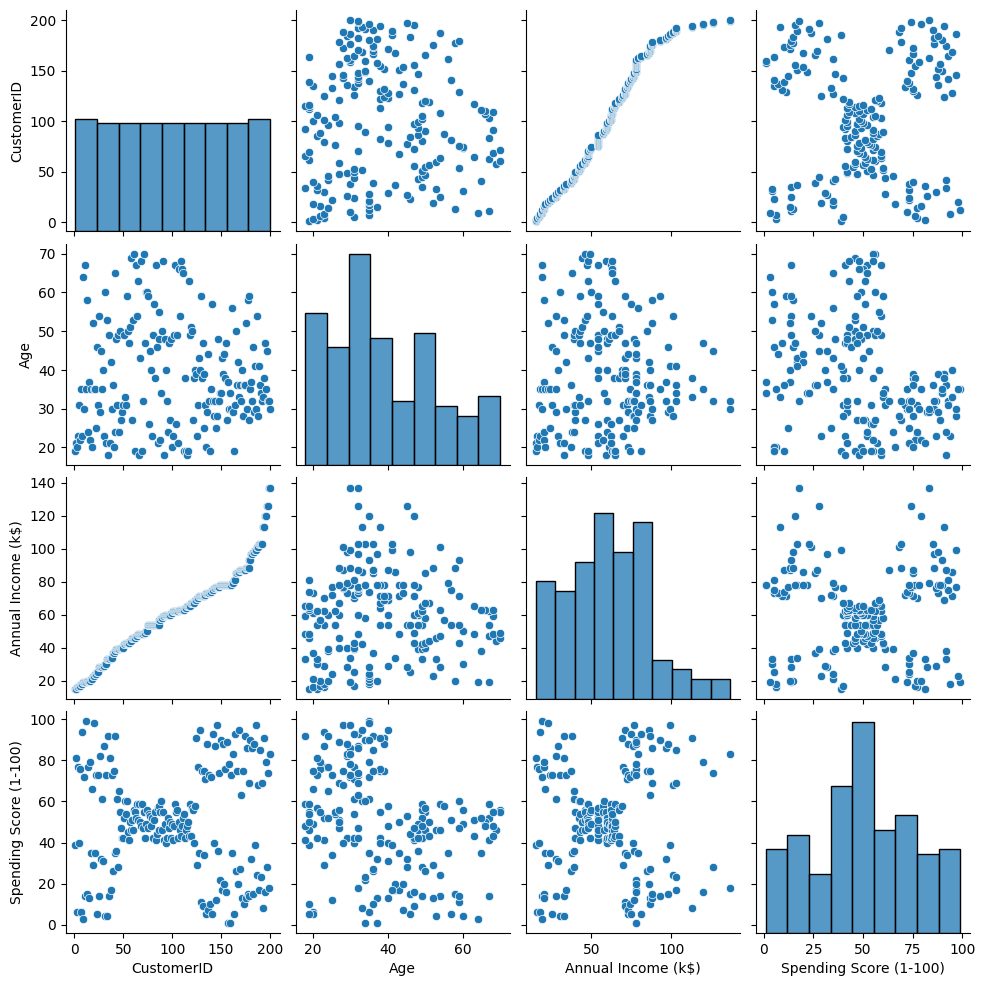

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)  # Para ver relaciones entre variables
plt.show()

2. Preprocesamiento de Datos:

In [11]:
data = pd.get_dummies(data, drop_first=True)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

3. Selección de Características:

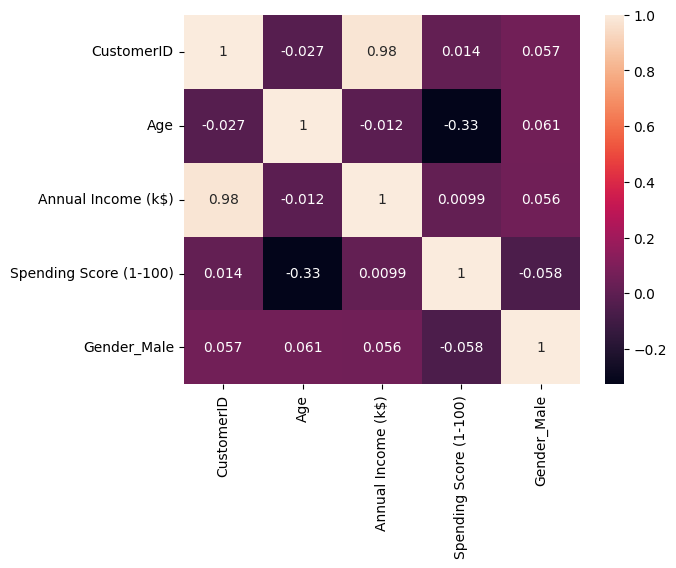

In [15]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

La correlación entre características, usamos un Heatmap en donde se observa la correlación entre las variables, y para seleccionar las variables más
importantes usamos la selección de características como SelectkBest de sklearn.

4. Entrenamiento del Modelo:

* K-means Clustering

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)  # Ajusta el número de clusters
kmeans.fit(data_scaled)
data['Cluster'] = kmeans.labels_

* Hierarchical Clustering

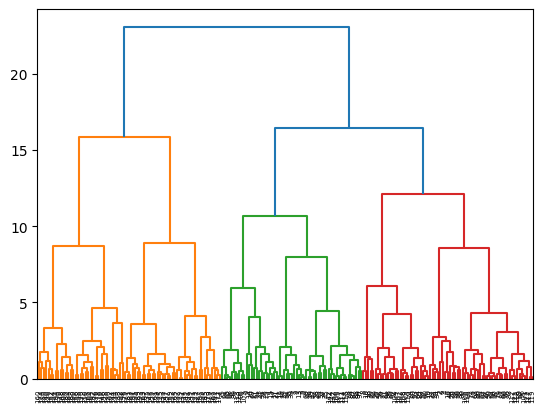

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(data_scaled, method='ward')
dendrogram(linked)
plt.show()

Aquí nos muestra el Dendrograma en donde las muestras en la base (eje X) se agrupan sucesivamente según su similitud, definida por una métrica de distanciay las alturas de las uniones (eje Y) indican la distancia o disimilitud entre los grupos.

* Obtenemos los clusters:

In [21]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5)
data['Cluster'] = hc.fit_predict(data_scaled)

5. Evaluación del Desempeño del Modelo:

* Coeficiente de Silhouette

In [23]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(data_scaled, kmeans.labels_)
print(f"Coeficiente de Silhouette: {silhouette}")

Coeficiente de Silhouette: 0.28733914723855114


* Índice de Calinski-Harabasz

In [25]:
from sklearn.metrics import calinski_harabasz_score
calinski = calinski_harabasz_score(data_scaled, kmeans.labels_)
print(f"Índice de Calinski-Harabasz: {calinski}")

Índice de Calinski-Harabasz: 71.72502500881443


In [35]:
from sklearn.metrics import davies_bouldin_score

# Después de aplicar K-means o cualquier modelo de clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_data)
labels = kmeans.labels_

# Calcular el índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Índice de Davies-Bouldin: 1.1259904033253574


Evaluaremos el desempeño del modelo en donde usaremos el Coeficiente de Silhouette, el Índice de Calinski-Harabasz y también calcularemos
el índice de Davies-Bouldin, estas métricas nos ayudan a evaluar la calidad de los clusters generados por el modelo de clustering, en donde nos da como resultado lo siguiente:

1. Coeficiente de Silhouette: 0.28733914723855114
2. Índice de Calinski-Harabasz: 71.72502500881443
3. Davies-Bouldin: 1.1259904033253574

El Coeficiente de Silhouette nos da un valor de aproximadamente 29 que nos indica que los puntos están relativamente bien agrupados, pero hay margen de mejora. No es un valor muy alto, lo que sugiere que los clústeres no son muy compactos ni bien 
separados.
El Índice de Calinski-Harabasz nos da un valor aproximado de 71.73 es relativamente bajo, lo que sugiere que los clústeres no están tan bien diferenciados entre sí y que hay cierta superposición de los puntos.
Y el Davies-Bouldin nos da un valor aproximado de 1.13 lo cual es aceptable, pero no es excelente. Lo favorable es que debería ser más cercano a 0. Esto nos sugiere que la calidad del clustering es moderada, ya que los clústeres son algo dispersos o están relativamente cerca entre sí.

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)  # Asegúrate de usar el DataFrame 'data' con los datos correctos

6. Visualización de los Resultados:

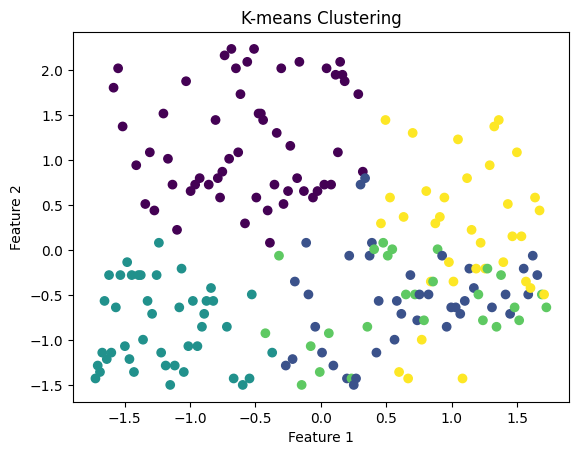

In [27]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-means Clustering")
plt.show()

El grafico de dispersión nos muestra que K-means fue nos identificó patrones en los datos, agrupándolos en 4 clusters, en los datos, los cuales parecen estar 
razonablemente separados en el espacio bidimensional definido por las características (Feature 1 y Feature 2). Esto nos sugiere que los datos tienen 
patrones subyacentes que nos permiten una segmentación en estas cuatro categorías, en cuanto a la Relación entre los clusters, los grupos están bien 
definidos, aunque hay cierta proximidad entre el cluster azul y el verde, lo que nos podría indicar alguna superposición o la existencia de dato. El cluster 
amarillo es más disperso, lo que sugiere que las observaciones dentro de este grupo son más diversas entre sí.

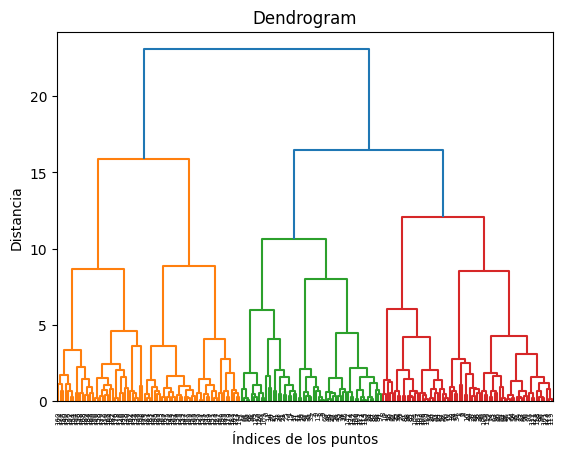

In [29]:
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Índices de los puntos')
plt.ylabel('Distancia')
plt.show()

Vemos en el Dendrograma, que nos muestra Eje horizontal encontramos los (Índices de los puntos), y en el Eje vertical (la Distancia). En donde observamos 3 grandes grupos o clusters principales, diferenciados por colores (naranja, verde y rojo), cuanto más alta es la línea que une dos grupos, más diferentes son entre sí, los elementos que se unen a una altura baja son muy similares entre sí, la línea azul superior (altura 22) une todos los grupos, nos indica que ese es el nivel donde todos los clusters se relacionan.
El eje horizontal (índices de los puntos) nos muestra los diferentes elementos analizados la escala de distancia en el eje y va de 0 a aproximadamente 25. Los elementos dentro de cada color forman grupos naturales de datos similares hay una clara separación entre los tres grupos principales, lo que sugiere que hay características distintivas entre ellos.